<center><img src="images/ML_video_w_s.webp" style="margin: 20 auto;"></center>
<p style="font-family: Protomolecule; font-size: 2.3em; line-height: 90%; margin: 0 auto; text-align: center; width: 100%;"><span style="letter-spacing: .1rem;">Machine</span><br><span style="letter-spacing: -.1rem;">Learning</span></p>
<p class="author" style="font-family: Protomolecule; margin: 0px auto;  text-align: center; width: 100%; font-size: 1.2em;">Joern Ploennigs</p>
<p class="subtitle" style="font-family: Protomolecule; font-size: larger; margin: 1em auto; text-align: center; width: 100%; font-size: 1.2em;">Reinforcement Learning</p>

# Reinforcement Learning

![](images/midjourney_a_donkey_following_a_carrot.png)
> The way positive reinforcement is carried out is more important than the amount.
> 
> — Burrhus Frederic Skinner

Reinforcement Learning (RL) ist ein Bereich des maschinellen Lernens, bei dem ein Agent lernt, in einer Umgebung durch Interaktionen zu handeln, um eine maximale Belohnung zu erzielen. Der Agent nimmt Aktionen basierend auf seinem aktuellen Zustand vor und erhält Belohnungen oder Bestrafungen, die er verwendet, um seine Strategie zu verbessern. 

Das macht auf der einen Seite RL vom Konzept her einfach zu verstehen und zu implementieren. Die Spezifikation der Belohnungsstrategie ist allerdings meist schwierig, da dies Verständnis des Problems erfordert. Der Ansatz benötigt keine gelabelte Trainingsdaten, ist also kein Überwachter ML-Ansatz. Er ist auch kein unüberwachter Ansatz, da ja durchaus Wissen in Form der Belohnungsstrategie notwendig ist.

RL eignet sich insbesondere für dynamische Entscheidungen und wird häufig in der Robotik verwendet, aber wird auch immer beliebter in traditionellen Gebieten.

## <a href="/lec_slides/15_Reinforcement_Learning.slides.html">Folien</a>
<iframe src="/lec_slides/15_Reinforcement_Learning.slides.html" width="750" height="500"></iframe>

## Grundlegende Konzepte

Reinforcement Learning basiert auf einer iterativen Lernstrategie, bei der die Qualität der Lösung durch positives oder negatives Feedback bewertet wird. Das RL-Modell wird hierbei als Agent gesehen, der mit der Umgebung interagiert. Die Begriffe in diesem Kontext sind:

- **Agent (Agent)**: Der Lernende oder Entscheidungsträger, der in der Umgebung agiert.
- **Umgebung (Environment)**: Alles, mit dem der Agent interagiert.
- **Aktion (Action)**: Eine Entscheidung oder Bewegung, die der Agent treffen kann.
- **Belohnung (Reward)**: Rückmeldung aus der Umgebung, die angibt, wie gut eine Aktion im gegebenen Zustand war.
- **Wertfunktion (Value Function)**: Eine Funktion, die angibt, wie gut ein bestimmter Zustand oder eine Aktion ist.
- **Strategie (Policy)**: Eine Strategie, die der Agent verwendet, um Aktionen zu wählen basierend auf dem Zustand und der Wertfunktion.
- **Zustand (State)**: Eine Repräsentation der aktuellen Situation der Umgebung und ggf. der Strategie.

<center>

<img src="images/rl_workflow.drawio.svg" alt="Komponenten und Begriffe beim Reinforcement Learning"/>

</center>

Zur Modellierung der Umgebung und aktuellen Strategie verwendet man im RL oft ein _Markov Decision Processes (MDPs)_. Das ist ein diskretes Zustandsmodell, bei dem das System sich immer nur in einem einzigen Zustand befinden kann, der die Umgebung (oder Strategie) widerspiegelt  und die Aktion bestimmt. Jeder Zustand beschreibt eine bestimmte Bedingung oder Position im Verhalten des Systems. Der Zustand wird auf Basis der Belohnung von der Umgebung gewechselt. 

_Markov-Modelle_ sind eine sehr beliebte Modelltyp im Maschinellem Lernen. Sie basieren alle auf der _Markov-Bedingung_, dass die Übergangswahrscheinlichkeit von einem Zustand in den anderen nur von dem aktuellen Zustand abhängt und nicht vorhergehenden Zuständen (es gibt also keine Autokorrelation). Man spricht dabei auch von der _Gedächtnislosigkeit_. Dies basiert auf der Idee, dass der Zustand des Systems zu einem bestimmten Zeitpunkt alle Informationen enthält, die notwendig sind, um sein zukünftiges Verhalten vorherzusagen.

Ein MDP besteht aus:
- $ S $: Menge aller möglichen Zustände.
- $ A $: Menge aller möglichen Aktionen.
- $ P(s'|s, a) $: Übergangswahrscheinlichkeit vom Zustand $ s $ zum Zustand $ s' $ bei Aktion $ a $.
- $ R(s, a) $: Belohnungsfunktion, die die Belohnung angibt, die der Agent erhält, wenn er im Zustand $ s $ die Aktion $ a $ ausführt.
- $ \gamma $: Diskontierungsfaktor, der zukünftige Belohnungen abwertet.

<center>

<img src="images/rl_mdp.drawio.svg" alt="Beispiel eines MDP Zustandsdiagrams mit drei Zuständen"/>

</center>

Der MDP modelliert also die Zustände und die bisherige Übergangswahrscheinlichkeit sowie die erhaltenen Belohnungen. Die entscheidende Frage im Reinforcement Learning ist nun, wie man daraus die beste Aktion und somit den nächsten Zustand ableiten kann. Hierbei gibt es das Dilemma, das aufgrund der Markov-Bedingung das Modell zwar einfach ist, aber wir auch gedächtnislos sind, wir also nicht die Historie der Zustände mit in unserer Entscheidung betrachten können. Das ist problematisch, wenn das Ziel nur erreicht werden kann, wenn eine bestimmte Zustandsfolge eintritt, wie in dem Gridworld-Beispiel unten diskutiert.

Eine wichtige Gleichung ist hierfür die _Bellman-Gleichung_. Sie beschreibt die Beziehung zwischen dem aktuellen Zustands-Aktionspaar $(s,a)$, der beobachteten Belohnung und den möglichen Nachfolge-Zustands-Aktionspaaren $s',a'$. Diese Beziehung wird verwendet, um die optimale Wertfunktion zu finden.

Die Bellman-Gleichung basiert auf dem Prinzip der Optimalität, das besagt, dass ein optimaler Policy eine rekursive Struktur aufweist. Das bedeutet, dass der Wert eines Zustands unter einer optimalen Policy aus der sofortigen Belohnung und dem diskontierten Wert der zukünftigen Zustände besteht. Die Bellman-Gleichung für die _Wertfunktion_ $V(s)$ eines Zustands $s$ definiert den Wert eines Zustands als die erwartete Belohnung für die beste Aktion in diesem Zustand plus den diskontierten Wert des besten nächsten Zustands, unter der Annahme, dass der Agent die optimale Policy verfolgt. Mathematisch formuliert lautet die Bellman-Optimalitätsgleichung:

$$
V(s) = \max_a \left( R(s, a) + \gamma \sum_{s'} P(s'|s, a) V(s') \right)
$$

Diese Gleichung besagt, dass der optimale Wert eines Zustands $s$ die maximale erwartete Belohnung ist, die der Agent erhalten kann, wenn er im Zustand $s$ startet, die Aktion $a$ wählt und danach der optimalen Policy folgt. Dadurch berücksichtigen wir bei der Bewertung des Zustandsüberganges durch die Aktion $a$ nicht nur den aktuellen Zustand, sondern auch die durch Aktion $a$ ermöglichten zukünftigen  Zustandsübergänge. Damit lösen wir das Dilemma der Gedächtnislosigkeit, das aus der Markov-Bedingung folgt.

Die Bellman-Gleichung wird genutzt, um die optimale Strategie in Form einer _Q-Funktion_ $Q(s,a)$ im _Q-Learning_ zu erlernen. Das ist ein populärer Off-Policy-Algorithmus, bei dem der Agent eine Q-Funktion $ Q(s, a) $ lernt, welche Belohnungen einer Aktion $ a $ in einem Zustand $ s $ erwartet wird.

$$
Q(s, a) \leftarrow Q(s, a) + \alpha \left( R(s, a) + \gamma \max_{a'} Q(s', a') - Q(s, a) \right)
$$

hierbei stellt $\alpha$ die Lernrate dar. Die ist ein sehr wichtiger Parameter, da er entscheidet, wie schnell das Modell auf eine Lösung konvergiert. Ein niedriger Wert sorgt dazu, dass der Algorithmus mehr positive Beispiele zum Lernen benötigt, was also längeres Training erfordert, insbesondere bei seltenen, positiven Feedback. Ein hoher Wert kann dazu sorgen, dass sich das Modell schnell in einer schlechteren Lösung (lokales Optimum) verrennt.

Deshalb kombiniert man den Algorithmus man meist mit einer Erkundungsstrategie. Statt immer nur die geschätzte optimale Strategie $Q(s,a)$ zu nehmen, wählt man mit der Wahrscheinlichkeit $\epsilon$ zufällige Strategien aus, um somit alternative Strategien zu entdecken. Ein hoher $\epsilon$-Wert sorgt für eine hohe Erkundungsrate (Exploration), während ein niedriger ein verlässlichere Vorhersage erlaubt. Um hier einen Trade-Off zu finden, macht man oft beides und wählt am Anfang des Trainings ein hohes $\epsilon$, um den Lösungsbereich zu erkunden und am Ende des Trainings ein niedriges $\epsilon$ um schneller und verlässlicher zu konvergieren.

## Beispiel: Gridworld-Umgebung

Wir werden eine einfache Gridworld-Umgebung verwenden, um die Grundprinzipien von Reinforcement Learning zu veranschaulichen. In dieser Umgebung versucht ein Agent, in einem Grid von einem Startzustand zu einem Zielzustand zu gelangen und dabei den kürzesten Weg zu finden.

Wir erstellen uns als erstes eine Klasse, welche die Umgebung repräsentiert und die Zustände enthält. Die Umgebung initialisiert zuerst unser Raster (Grid) mit der Start- und Endposition. Dieses Raster definiert unseren Zustandsraum, da der Agent, wenn er sich fort bewegt sich in jeder dieser Zellen im Raster aufhalten kann.

Damit wir Experimente beim Lernen wiederholen können gibt es eine `reset`-Funktion. Mit der `step`-Funktion kann der Agent sich fortbewegen. Wir übergeben der Funktion als `action` die Richtung, in der wir uns bewegen wollen. Dadurch wechselt sich die aktuelle Position, also der aktuelle Zustand in unserem Zustandsmodell.

In [1]:
import numpy as np # Import von NumPy

# Definition der Gridworld-Umgebung
class Gridworld:
    def __init__(self, size, start, goal):
        self.size = size
        self.start = start
        self.goal = goal
        self.state = start
        self.actions = ['up', 'down', 'left', 'right']
        self.grid=np.zeros((self.size,self.size))
        self.grid[start]=1
        self.grid[goal]=0

    def reset(self):
        self.state = self.start
        return self.state

    def step(self, action):
        x, y = self.state
        if action == 'up':
            x = max(0, x - 1)
        elif action == 'down':
            x = min(self.size - 1, x + 1)
        elif action == 'left':
            y = max(0, y - 1)
        elif action == 'right':
            y = min(self.size - 1, y + 1)
        self.state = (x, y)
        self.grid[self.state]+=1
        reward = 1 if self.state == self.goal else -0.1
        done = self.state == self.goal
        return self.state, reward, done

Erstellen wir uns als Beispiel ein 3x3 Gridworld und wollen uns vom Punkt $[0,0]$ zum Punkt $[3,3]$ bewegen.

In [2]:
env = Gridworld(size=4, start=(0, 0), goal=(3, 3))
state = env.reset()
print("Startzustand:", state)
env.grid

Startzustand: (0, 0)


array([[1., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

Der Zustandsraum ist hierbei ein 2D Grid

<center>

<img src="images/rl_gridworld.drawio.svg" alt="Zustandsraum von Gridworld"/>

</center>

Bewegen wir uns einmal manuell durch das Grid, so sehen wir wie die Zustände (unsere Position) sich ändern und welche Belohnungen wir erhalten. Wichtig hierbei ist, dass wir eine positive Belohnung erst beim letzten Schritt erhalten, vorher immer nur bestraft werden (z.B. Erschöpfung).

In [3]:
# Beispiel für einen Schritt in der Umgebung
steps=['right','down','right','down','right','down']
for step in steps:
    next_state, reward, done = env.step(step)
    print("Nächster Zustand:", next_state, "Belohnung:", reward, "Ziel erreicht:", done)

Nächster Zustand: (0, 1) Belohnung: -0.1 Ziel erreicht: False
Nächster Zustand: (1, 1) Belohnung: -0.1 Ziel erreicht: False
Nächster Zustand: (1, 2) Belohnung: -0.1 Ziel erreicht: False
Nächster Zustand: (2, 2) Belohnung: -0.1 Ziel erreicht: False
Nächster Zustand: (2, 3) Belohnung: -0.1 Ziel erreicht: False
Nächster Zustand: (3, 3) Belohnung: 1 Ziel erreicht: True


In [4]:
import plotly.express as px
px.imshow(env.grid)

## Random Walk

Ein naiver Lösungsansatz ist der so genannte Random Walk (Zufallsweg), bei dem man bei jedem Schritt in eine zufällig gewählte Richtung läuft, was auch bedeutet, dass man ggf. zurück läuft. Untersuchen wir einmal in 500 Experimenten die Erfolgschancen dieser Lösungsstrategie.

In [5]:
env = Gridworld(size=4, start=(0, 0), goal=(3, 3))
trials = 500

rewards = []
retries = []
for trial in range(trials):
    env.reset()
    n, r_sum = 0, 0
    done = False
    while not done:
        # Wir wählen eine zufällige Aktion
        action = np.random.choice(env.actions)
        # Führe die Aktion aus und erhalte von der Umgebung den neuen Zustand und die Belohnung
        new_state, reward, done = env.step(action)
        # Sammel Erfolgsstatistik
        r_sum += reward
        n += 1
    rewards.append(r_sum)
    retries.append(n)

In allen Experimenten ist unser Agent zum Ziel gekommen, was zeigt, dass diese zufällige Explorations-Strategie durchaus erfolgreich ist. Schauen wir auf die Anzahl der Versuche bis zum Ziel über unsere Experimente, so sehen wir, dass diese gleichbleibend stark variiert. Wir haben also kein Lerneffekt.

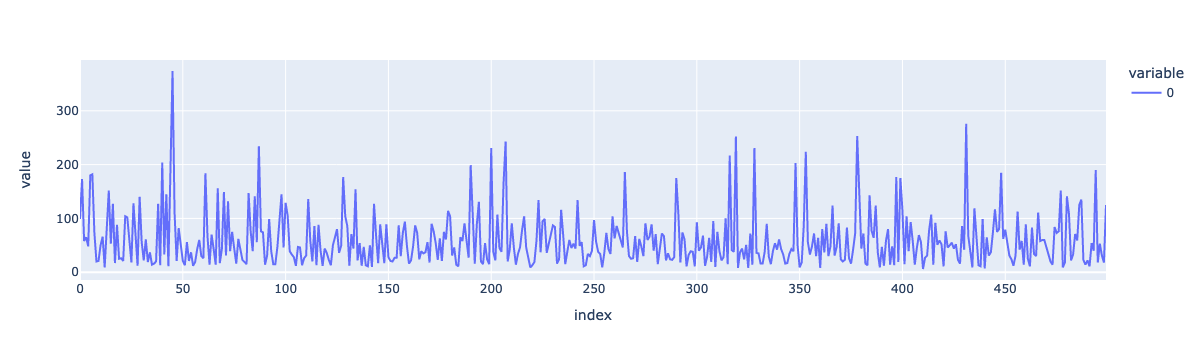

In [6]:
import plotly.express as px
px.line(retries)

Entsprechend niedrig sind auch die Belohnungen, die das Programm pro Experiment sammelt.

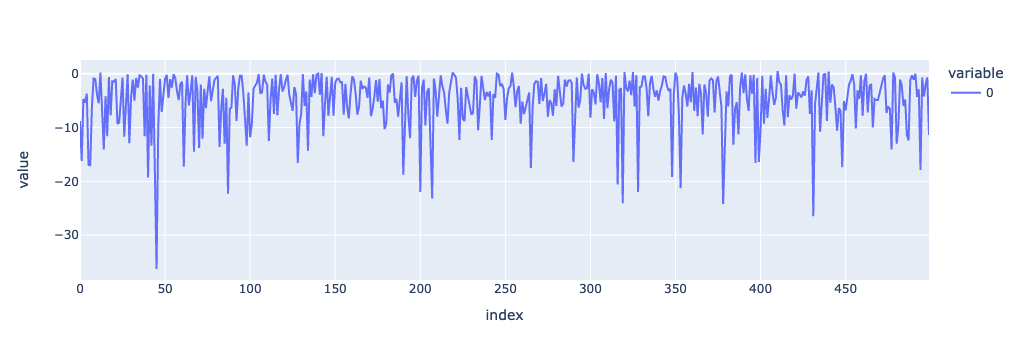

In [7]:
px.line(rewards)

Wenn wir uns die Häufigkeit ansehen, der besuchten Rasterpunkte, so zeigt sich, dass der Großteil der Versuche um dem Starpunkt herum hängen bleibt, also oft auch wieder sich zurückbewegt.

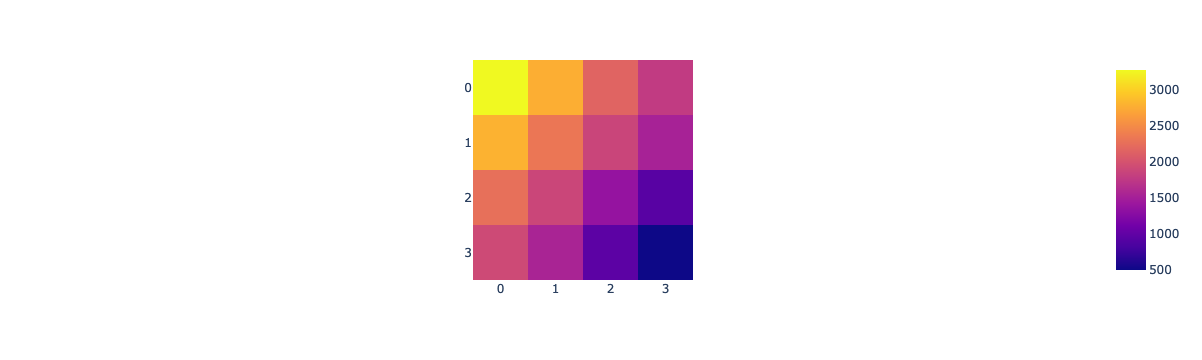

In [8]:
px.imshow(env.grid)

## Q-Learning

Wir implementieren als nächstes den Q-Learning Ansatz wie er oben beschrieben worden ist. Hierfür initialisieren wir als erstes die Q-Matrix, in welcher wir die erlernten Q-Werte speichern. Da unser Zustandsraum die Große 3x3 hat und wir 4 Aktionen haben, hat die Q-Matrix eine Größe von 3x3x4.

Der Q-Learning Algorithmus besteht nun zum einen in der Möglichkeit mit der Wahrscheinlichkeit $\epsilon$ ein explorativen zufälligen Schritt zu machen oder den vielversprechendsten Schritt unseres aktuellen Zustands $s_1,s_2$ mit dem maximalen Q-Wert (argmax).

In [9]:
env = Gridworld(size=4, start=(0, 0), goal=(3, 3))

# Initialisiere Q-Werte
Q = np.zeros((env.size, env.size, len(env.actions)))

# Hyperparameter
alpha = 0.2  # Lernrate
gamma = 0.9  # Diskontierungsfaktor
epsilon = 0.1  # Epsilon für die Epsilon-Greedy-Strategie

rewardsQ=[]
retriesQ=[]
for trial in range(trials):
    state = env.reset()
    done = False
    n, r_sum=0, 0
    while not done:
        if np.random.uniform(0,1) < epsilon:
            # Wähle Aktion entweder Zufällig aus
            action = np.random.randint(0, len(env.actions))
        else:
            # Wähle Aktion mit maximaler erwarteten Belohnung Q(s)
            action = np.argmax(Q[state[0], state[1], :])
        # Führe die Aktion aus und erhalte von der Umgebung den neuen Zustand und die Belohnung
        new_state, reward, done = env.step(env.actions[action])
        # Aktualisiere Q-Werte auf Basis der erhaltenen Belohnung
        Q[state[0], state[1], action] += alpha * (reward + gamma * np.max(Q[new_state[0], new_state[1], :]) - Q[state[0], state[1], action])
        # Aktualisiere den Zustand
        state = new_state
        # Sammel Erfolgsstatistik
        r_sum+=reward
        n += 1
    rewardsQ.append(r_sum)
    retriesQ.append(n)

Wenn wir nun die Wiederholungsversuche uns ansehen, dann sehen wir, dass diese schnell auf das Minimum von nur 6 Schritte abfallen. Es gibt immer noch Schwankungen, die an dem Zufallsanteil $\epsilon$ liegen.

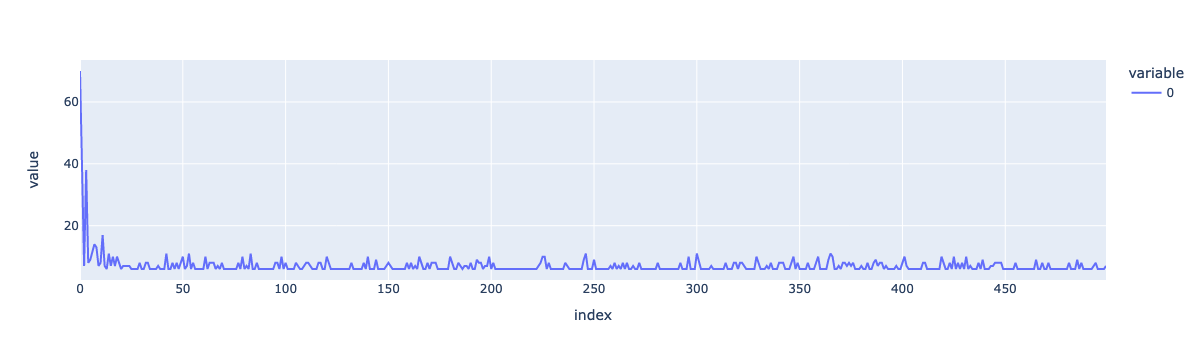

In [10]:
px.line(retriesQ)

Betrachten wir die Belohnungen, so sehen wir, dass der Ansatz sehr schnell nur noch positive Belohnungen erzieht.

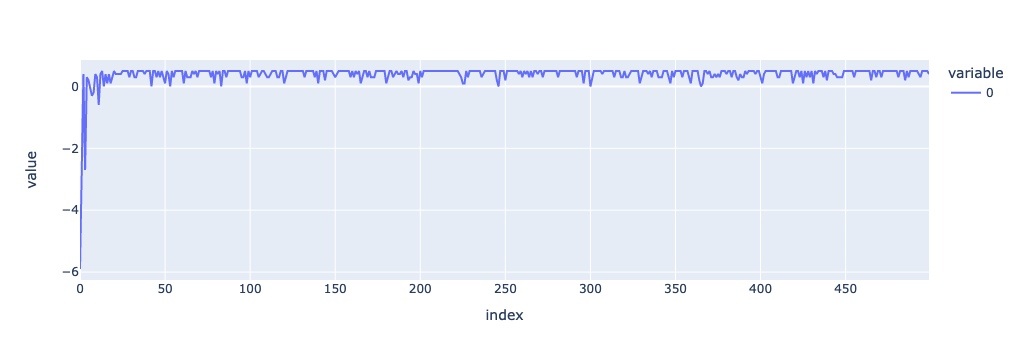

In [11]:
px.line(rewardsQ)

Der resultierende Weg ist hierbei einer von vielen optimalen Wegen.

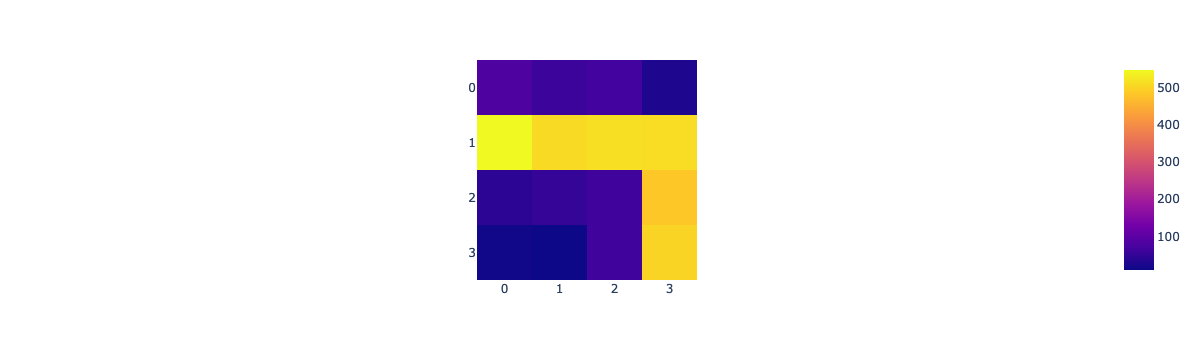

In [12]:
px.imshow(env.grid)

## Zeitreihe

Mit Reinforcement Learning kann man auch Modelle auf Zeitreihen trainieren. Wir wollen uns zum Beispiel einen Entscheidungsalgorithmus trainieren, welcher lernt, wann er Aktien oder Shorts auf diese kaufen soll und wann er sie verkaufen soll. Hier ein zufälliger Aktienkurs.

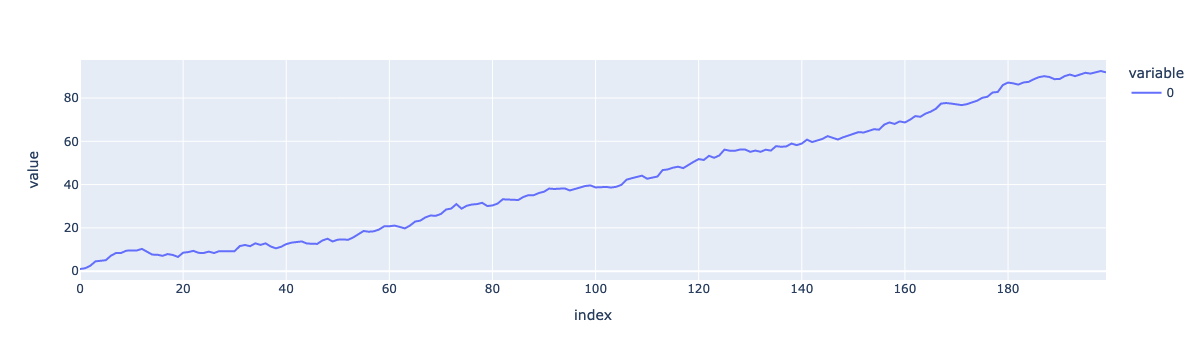

In [13]:
import numpy as np
import pandas as pd

# Simulierte Zeitreihe (z.B. Aktienpreise)
np.random.seed(42)
data = np.cumsum(np.random.randn(200) + 0.5)

# Daten visualisieren
px.line(data)

Wir definieren uns wieder eine Trainingsumgebung. Dieses Mal haben wir allerdings die Schwierigkeit, dass der Wert kontinuierlich sind und nicht diskret, wir also keine natürliche Zustandsraumdarstellung haben. Deshalb müssen wir die kontinuierliche Zeitreihe des Aktienwertes zuerst diskretisieren.

In [14]:
class StockTradingEnv:
    def __init__(self, data, num_states=40):
        self.data = data
        self.current_step = 0
        self.state = None
        self.states = np.linspace(min(data), max(data), num_states)
        self.done = False
        self.actions = ['kaufen', 'verkauf']
        self.position = 0  # 1 = long, -1 = short, 0 = neutral
        self.balance = 0
        self.current_price=0
        self.old_price = 0

    def discretize(self):
        return np.digitize(self.data[self.current_step], self.states) - 1

    def reset(self):
        self.current_step = 0
        #self.state = self.data[self.current_step:self.current_step+5]
        self.state = self.discretize()
        self.done = False
        self.position = 0
        self.balance = 0
        self.old_price = 0
        self.current_price=0
        return self.state

    def step(self, action):
        self.current_step += 1
        if self.current_step > len(self.data) - 2:
            self.done = True
        self.current_price = self.data[self.current_step]
        reward = 0
        if action == 0:  # Kaufen
            if self.position == 0: # Kaufe Aktie
                self.position = 1
                self.balance -= self.current_price
                self.old_price = self.current_price
            elif self.position == -1: # Verkaufe Short
                reward = 2 * (self.old_price - self.current_price)
                self.position = 0
                self.balance += self.old_price
        elif action == 1:  # Verkaufen
            if self.position == 0: # Kaufe Short
                self.position = -1
                self.balance += self.current_price
                self.old_price = self.current_price
            elif self.position == 1: # Verkaufe Aktie
                reward = 2 * (self.current_price - self.old_price)
                self.position = 0
                self.balance -= self.old_price
        elif action == 2:  # Halten
            pass
        self.state = self.discretize()
        return self.state, reward, self.done

Als Beispiel kaufen wir Akten, halten sie für 6 Züge und verkaufen sie. Dann kaufen wir Shorts, um auf fallende Aktien zu wetten, halten sie wieder und verkaufen sie.

In [15]:
num_states=40

# Beispiel für die Erstellung und Verwendung der StockTradingEnv-Umgebung
env = StockTradingEnv(data, num_states)
state = env.reset()
print("Startzustand:", state)

# Beispiel für einen Schritt in der Umgebung
for action in [0,2,2,2,2,2,1,1,2,2,2,2,2,0]:#  0 = Kaufen, 2 = Halten, 1 = Verkaufen
    next_state, reward, done = env.step(action)  
    print("Nächster Zustand:", next_state, "Belohnung:", reward, "Ziel erreicht:", done)

Startzustand: 0
Nächster Zustand: 0 Belohnung: 0 Ziel erreicht: False
Nächster Zustand: 0 Belohnung: 0 Ziel erreicht: False
Nächster Zustand: 1 Belohnung: 0 Ziel erreicht: False
Nächster Zustand: 1 Belohnung: 0 Ziel erreicht: False
Nächster Zustand: 1 Belohnung: 0 Ziel erreicht: False
Nächster Zustand: 2 Belohnung: 0 Ziel erreicht: False
Nächster Zustand: 3 Belohnung: 14.098151214993003 Ziel erreicht: False
Nächster Zustand: 3 Belohnung: 0 Ziel erreicht: False
Nächster Zustand: 3 Belohnung: 0 Ziel erreicht: False
Nächster Zustand: 3 Belohnung: 0 Ziel erreicht: False
Nächster Zustand: 3 Belohnung: 0 Ziel erreicht: False
Nächster Zustand: 3 Belohnung: 0 Ziel erreicht: False
Nächster Zustand: 3 Belohnung: 0 Ziel erreicht: False
Nächster Zustand: 2 Belohnung: 1.565646416803098 Ziel erreicht: False


Als nächstes implementieren wir wieder den Q-Learning Algorithmus. Der ist fast identisch zu dem Gridworld-Beispiel. Unterschiede gibt es nur, da wir nur eine zweidimensionale Q-Matrix haben, statt einer dreidimensionalen, da der Zustandsraum weniger Dimensionen hat.

In [16]:
import time

# Beispiel für die Erstellung und Verwendung der StockTradingEnv-Umgebung
tic=time.time()
env = StockTradingEnv(data, num_states)

# Initialisiere Q-Werte
Q = np.zeros((num_states, 3))

# Hyperparameter
alpha = 0.1  # Lernrate
gamma = 0.9  # Diskontierungsfaktor
epsilon = 0.1  # Epsilon für die Epsilon-Greedy-Strategie

# Training des Q-Learning-Agenten
for episode in range(1000):
    state = env.reset()
    done = False
    actions = []
    rewards = []
    total_reward = 0
    
    while not done:
        if np.random.random() < epsilon:
            # Wähle Aktion entweder Zufällig aus
            action = np.random.randint(0, len(env.actions))
        else:
            # Wähle Aktion mit maximaler erwarteten Belohnung Q(s)
            action = np.argmax(Q[env.state])
        # Führe die Aktion aus und erhalte von der Umgebung den neuen Zustand und die Belohnung
        new_state, reward, done = env.step(action)
        new_state_idx = env.current_step
        # Aktualisiere Q-Werte auf Basis der erhaltenen Belohnung
        Q[state, action] += alpha * (reward + gamma * np.max(Q[new_state]) - Q[state, action])
        # Aktualisiere den Zustand
        state = new_state
        # Sammel Erfolgsstatistik
        actions.append(action)
        total_reward+=-reward
        rewards.append(total_reward)
print(f"Execution Time: {time.time()-tic}")

Execution Time: 1.185906171798706


Auch hier zeigt sich, dass der Q-Learning Algorithmus erfolgreich lernt, wann er Aktien kaufen, verkaufen oder shorten soll, so dass er am Ende Gewinn macht. 

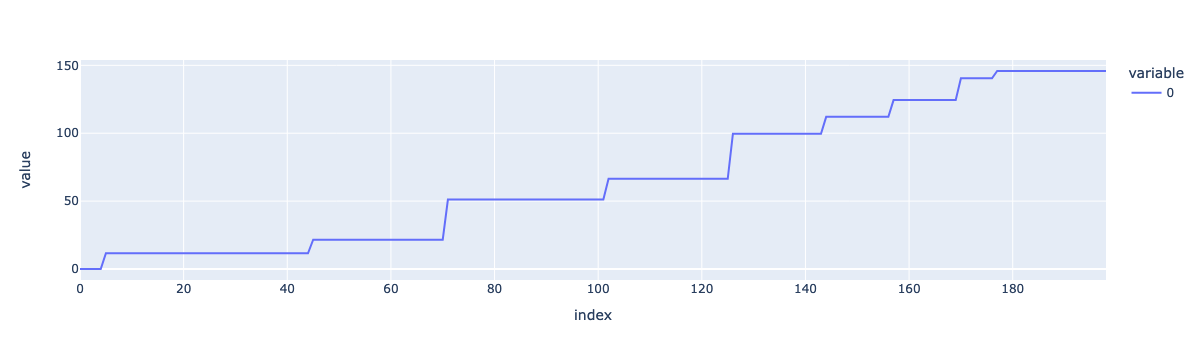

In [17]:
px.line(rewards)

Hierbei macht der Algorithmus gar nicht so viele Transaktionen, wie er könnte, um das Ergebnis zu maximieren.

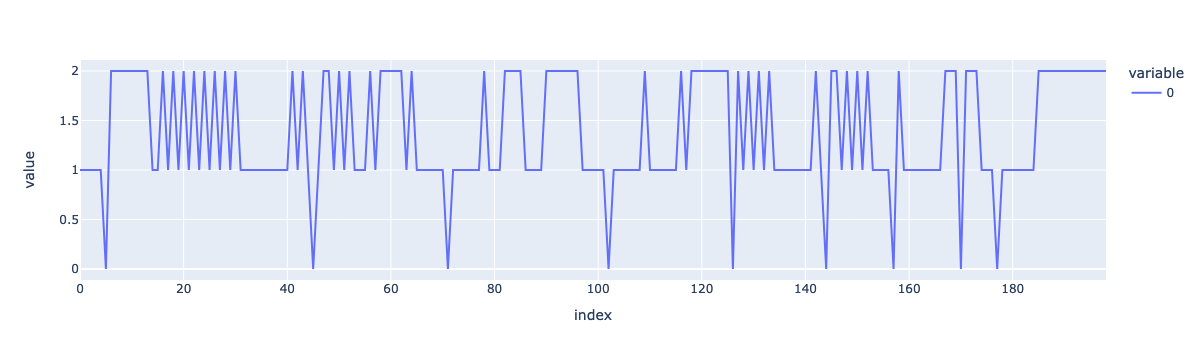

In [18]:
px.line(actions)

## RL Frameworks

RL gehört nicht zu den traditionellen ML-Verfahren und ist deshalb auch nicht in SciKit-Learn oder Statsmodels enthalten. Das liegt unter anderem daran, dass man beim RL nicht einfach ein Modell auf einem Datensatz trainiert, wie es von der Standard-API von SciKit-Learn erwartet wird, sondern manuell ein Umgebungsmodell erstellen muss.

Mit der wachsenden Popularität von RL in den letzten Jahren haben sich aber spezielle Bibliotheken für RL entwickelt, die dies vereinfachen und das Lösen komplexer Probleme vereinfachen. Eine Bibliothek dafür ist `Gymnasium` oder kurz `Gym` von OpenAI. Die `Gym`-Bibliothek ist eine Open-Source-Bibliothek, die speziell für die Entwicklung und das Testen von RL-Algorithmen entwickelt wurde. Sie bietet eine standardisierte API und eine Vielzahl von vordefinierten Umgebungen, die es ermöglichen RL-Algorithmen effizient zu implementieren und zu evaluieren. Hierbei spielt insbesondere die Definition der Umgebung eine wichtige Rolle.

Das Standard-Interface in `Gym` für eine Umgebung für den Börsenfall ist mehr oder weniger identisch mit der Klasse, die wir oben definiert haben.

In [19]:
import gymnasium as gym
from gymnasium import spaces
import numpy as np
import pandas as pd

class StockTradingEnvGym(gym.Env):
    def __init__(self, data):
        super(StockTradingEnvGym, self).__init__()
        self.data = data.copy()
        self.current_step = 0
        self.balance = 10000  # Startguthaben
        self.position = 0  # 0: neutral, 1: long, -1: short
        self.old_price = 0
        self.current_price = self.data[self.current_step]
        # Actions: 0 = Kaufen, 1 = Verkaufen, 2 = Halten
        self.action_space = spaces.Discrete(3)
        # Observation space: [current price, position, balance]
        self.observation_space = spaces.Box(
            low=np.array([-np.inf, -1, -np.inf]), 
            high=np.array([np.inf, 1, np.inf]), 
            dtype=np.float32
        )

    def reset(self, seed=0, options=None):
        self.current_step = 0
        self.balance = 10000
        self.position = 0
        self.current_price = self.data[self.current_step]
        return self._get_obs(), {}

    def _get_obs(self):
        return np.array([self.current_price, self.position, self.balance])

    def step(self, action):
        prev_price = self.current_price
        self.current_step += 1
        self.current_price = self.data[self.current_step]
        reward = 0
        if action == 0:  # Kaufen
            if self.position == 0: # Kaufe Aktie
                self.position = 1
                self.balance -= self.current_price
                self.old_price = self.current_price
            elif self.position == -1: # Verkaufe Short
                reward = 2 * (self.old_price - self.current_price)
                self.position = 0
                self.balance += self.old_price
        elif action == 1:  # Verkaufen
            if self.position == 0: # Kaufe Short
                self.position = -1
                self.balance += self.current_price
                self.old_price = self.current_price
            elif self.position == 1: # Verkaufe Aktie
                reward = 2 * (self.current_price - self.old_price)
                self.position = 0
                self.balance -= self.old_price
        elif action == 2:  # Halten
            reward = 0
        done = self.current_step >= len(self.data) - 1
        return self._get_obs(), reward, done, False, {}

    def render(self, mode='human'):
        print(f'Step: {self.current_step}, Price: {self.current_price}, Position: {self.position}, Balance: {self.balance}')

Ein Aspekt warum RL in den letzten Jahren so beliebt geworden ist, ist dass sich der Lernvorgang gut parallelisieren lässt. Da wir zum Lernen viele Experimente machen müssen, können wir diese natürlich auch parallel ausführen und dadurch gut in einem Rechenzentrum in der Cloud oder auf Grafikkarten mit ihren tausenden kleinen Prozessoren verteilen.

Eine Bibliothek, die hierbei viel genutzt wird, ist _Ray_ welche auch gerne zur Parallelisierung von ML-Aufgaben genutzt wird, da die Bibliothek das Verteilen der Lernaufgaben im Cluster und das Sammeln der Ergebnisse übernimmt.

Wir nutzen hier den _Proximale Policy Optimization (PPO)_ Algorithmus. Er ist ein iteratives Verfahren, welches zur Optimierung von Richtlinien in Agenten verwendet wird und instabile Updates der Policy vermeidet und ermöglicht so die effiziente Handhabung komplexer Aufgaben mit kontinuierlichen Aktionsräumen. Dies wird durch die Einführung eines Clip-Parameters ε erreicht, der die maximale Änderung der Policy-Parameter begrenzt.

In [20]:
import os
os.environ["PYTHONWARNINGS"]="ignore::DeprecationWarning"
from ray.rllib.algorithms.ppo import PPOConfig
from ray.tune.registry import register_env

tic=time.time()
def env_creator(env_config):
    return StockTradingEnvGym(data)  # return an env instance

register_env("StockTradingEnvGym", env_creator)

config = (
    PPOConfig()
    .environment("StockTradingEnvGym")
    .env_runners(num_env_runners=2)
    .framework("torch")
    .training()
    .evaluation(evaluation_num_env_runners=1)
)

algo = config.build()  # 2. build the algorithm,

for _ in range(10):
    algo.train()  # 3. train it,

#algo.evaluate()  # 4. and evaluate it.
print(f"Execution Time: {time.time()-tic}")

2024-06-24 11:11:54,421	WARNING algorithm_config.py:4078 -- You have specified 1 evaluation workers, but your `evaluation_interval` is 0 or None! Therefore, evaluation will not occur automatically with each call to `Algorithm.train()`. Instead, you will have to call `Algorithm.evaluate()` manually in order to trigger an evaluation run.
/Users/jploennigs/miniconda3/envs/lehre4/lib/python3.11/site-packages/ray/rllib/algorithms/algorithm.py:525: RayDeprecationWarning:

This API is deprecated and may be removed in future Ray releases. You could suppress this warning by setting env variable PYTHONWARNINGS="ignore::DeprecationWarning"
`UnifiedLogger` will be removed in Ray 2.7.

/Users/jploennigs/miniconda3/envs/lehre4/lib/python3.11/site-packages/ray/tune/logger/unified.py:53: RayDeprecationWarning:

This API is deprecated and may be removed in future Ray releases. You could suppress this warning by setting env variable PYTHONWARNINGS="ignore::DeprecationWarning"
The `JsonLogger interface i

Execution Time: 48.61755394935608


(RolloutWorker pid=80435) /Users/jploennigs/miniconda3/envs/lehre4/lib/python3.11/site-packages/gymnasium/core.py:311: UserWarning: WARN: env.single_observation_space to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.single_observation_space` for environment variables or `env.get_wrapper_attr('single_observation_space')` that will search the reminding wrappers.
(RolloutWorker pid=80435)   logger.warn(
(RolloutWorker pid=80435) /Users/jploennigs/miniconda3/envs/lehre4/lib/python3.11/site-packages/gymnasium/core.py:311: UserWarning: WARN: env.single_action_space to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.single_action_space` for environment variables or `env.get_wrapper_attr('single_action_space')` that will search the reminding wrappers.
(RolloutWorker pid=80435)   logger.warn(
(RolloutWorker pid=80435) 2024-06-24 11:12:46,958	W

In [21]:
# Evaluierung des Agents
env = StockTradingEnvGym(data)
state = env.reset()
done = False
total_reward = 0

actions = []
rewards = []
while not done:
    action = algo.compute_single_action(env._get_obs(), state)
    state, reward, done, _, _ = env.step(action[0])
    total_reward += reward
    actions.append(action)
    rewards.append(total_reward)
    env.render()

print("Gesamtbelohnung:", total_reward)

Step: 1, Price: 1.358449851840048, Position: 0, Balance: 10000
Step: 2, Price: 2.5061383899407406, Position: 0, Balance: 10000
Step: 3, Price: 4.529168246348766, Position: 0, Balance: 10000
Step: 4, Price: 4.79501487162543, Position: 1, Balance: 9995.204985128374
Step: 5, Price: 5.060877914676249, Position: 1, Balance: 9995.204985128374
Step: 6, Price: 7.1400907301836405, Position: 1, Balance: 9995.204985128374
Step: 7, Price: 8.407525459336549, Position: 1, Balance: 9995.204985128374
Step: 8, Price: 8.438051073401597, Position: 1, Balance: 9995.204985128374
Step: 9, Price: 9.480611116987562, Position: 1, Balance: 9995.204985128374
Step: 10, Price: 9.517193424175101, Position: 1, Balance: 9995.204985128374
Step: 11, Price: 9.551463670604845, Position: 1, Balance: 9995.204985128374
Step: 12, Price: 10.29342594217088, Position: 1, Balance: 9995.204985128374
Step: 13, Price: 8.88014569751308, Position: 1, Balance: 9995.204985128374
Step: 14, Price: 7.6552278650000485, Position: 1, Balance

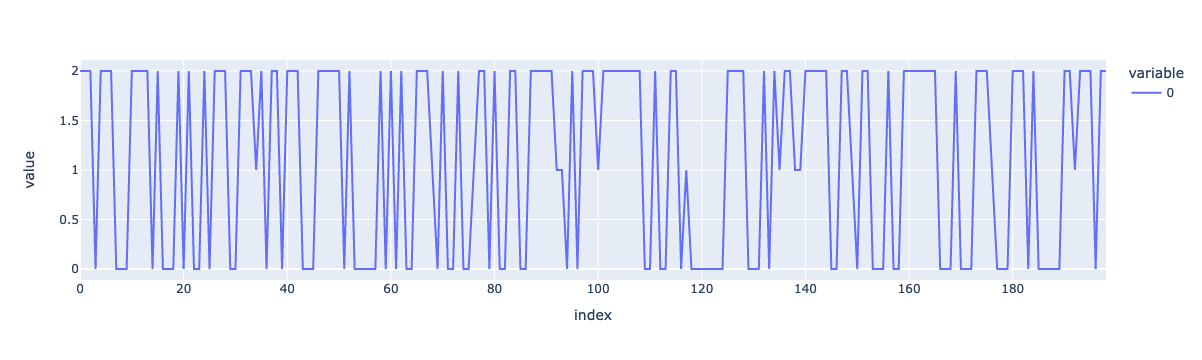

In [22]:
px.line([a[0] for a in actions])

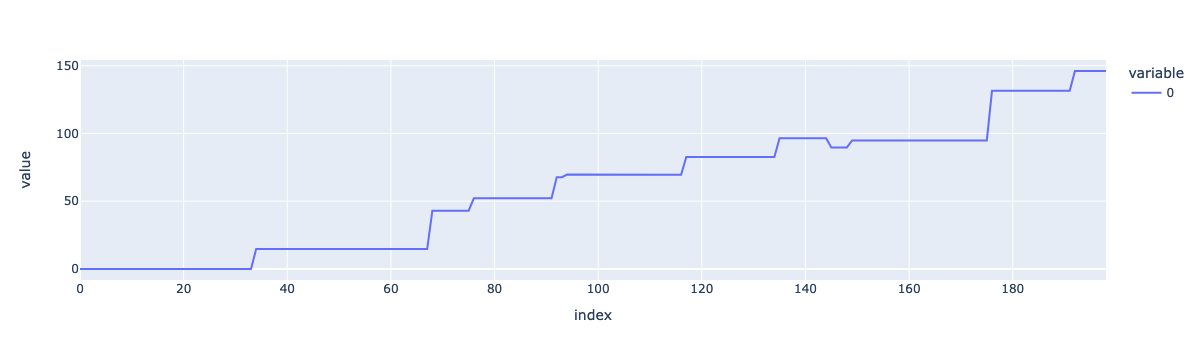

In [23]:
px.line(rewards)

## Robotik

DL ist insbesondere in der Robotik ein beliebtes Lernverfahren. Das liegt daran, das zum einen einfache Aufgaben, wie das Greifen von Objekten für Roboter hochkomplex sind und die Regelungen und Steuerungen sehr komplex zu entwickeln sind. Auch wir Menschen brauchen Wochen als Kleinkind um die Grob- und Feinmotorik dafür zu lernen. Trotzdem ist die Aufgabe und die Umgebung eines Roboters einfach zu simulieren. Deshalb setzt man vermehrt auf RL, um solche komplexen Steuerungsprobleme zu erlernen, statt selbstständisch Steuerungen zu entwickeln.

### Robot Pusher

Pusher-v4 ist eine Umgebung aus der gym-Bibliothek, die zur Simulation von Aufgaben im Bereich der Robotersteuerung verwendet wird. In dieser speziellen Umgebung wird ein Roboterarm simuliert, der darauf trainiert wird, ein Objekt zu einer bestimmten Zielposition zu schieben. 

Das Ziel des Agenten (Roboterarms) in der Pusher-v4-Umgebung ist es, ein Objekt (in der Regel ein Block) zu einer festgelegten Zielposition zu schieben. Der Agent muss lernen, wie er seine Gelenke bewegen kann, um das Objekt erfolgreich zu schieben.

Der Aktionsraum ist kontinuierlich und repräsentiert die Steuerung des Roboterarms. Typischerweise handelt es sich um einen Vektor von Gelenkbewegungen, die der Agent ausführen kann.

Der Beobachtungsraum umfasst verschiedene Aspekte des Zustands der Umgebung, einschließlich der Position des Endeffektors des Roboterarms; die Position des zu schiebenden Objekts und die Zielposition, zu der das Objekt geschoben werden soll.

Die Belohnung in der Pusher-v4-Umgebung basiert darauf, wie nah das Objekt an der Zielposition ist. Der Agent erhält eine höhere Belohnung, wenn das Objekt näher an der Zielposition ist, und eine geringere Belohnung, wenn es weiter entfernt ist.

Da das Modell in `Gym` enthalten ist, ist die Initialisierung einfach.

In [24]:
from ray.rllib.algorithms.ppo import PPOConfig

config = (  # 1. Configure the algorithm,
    PPOConfig()
    .environment("Pusher-v4", render_env=True)
    .env_runners(num_env_runners=2)
    .framework("torch")
    .training()
    .evaluation(evaluation_num_env_runners=1)
)

algo = config.build()  # 2. build the algorithm,

for _ in range(5):
    algo.train()  # 3. train it,

#algo.evaluate()  # 4. and evaluate it.
print(f"Execution Time: {time.time()-tic}")

2024-06-24 11:12:43,177	WARNING algorithm_config.py:4078 -- You have specified 1 evaluation workers, but your `evaluation_interval` is 0 or None! Therefore, evaluation will not occur automatically with each call to `Algorithm.train()`. Instead, you will have to call `Algorithm.evaluate()` manually in order to trigger an evaluation run.
/Users/jploennigs/miniconda3/envs/lehre4/lib/python3.11/site-packages/ray/rllib/algorithms/algorithm.py:525: RayDeprecationWarning:

This API is deprecated and may be removed in future Ray releases. You could suppress this warning by setting env variable PYTHONWARNINGS="ignore::DeprecationWarning"
`UnifiedLogger` will be removed in Ray 2.7.

/Users/jploennigs/miniconda3/envs/lehre4/lib/python3.11/site-packages/ray/tune/logger/unified.py:53: RayDeprecationWarning:

This API is deprecated and may be removed in future Ray releases. You could suppress this warning by setting env variable PYTHONWARNINGS="ignore::DeprecationWarning"
The `JsonLogger interface i

Execution Time: 79.14778399467468


Betrachten wir einmal das Ergebnis einer zufälligen Bewegung, so sehen wir wie der Arm vorerst orientierungslos agiert.

![](images/pusher.gif)

Nach mehreren Trainingsepisoden lernt der Algorithmus allerdings den Arm gut zu benutzen. Hier ein Vergleich unterschiedlicher RL-Ansätze. Zu beobachten ist, dass über die Trainings-Episoden die Modelle durch Zufall die Lösung entdecken und dann wiederholen können. Die finalen Lösungen sind dabei aber auch nach vielen Trainings-Episoden nicht perfekt.

In [2]:
from IPython.display import IFrame
IFrame(width="800", height="413", src="https://www.youtube.com/embed/_QmcH1TyNwg", title="Gymnasium - Pusher-v4, Test with different algorithms",
         frameborder="0", allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share", referrerpolicy="strict-origin-when-cross-origin", allowfullscreen=True)

### Pick and Place

"FetchPickAndPlaceDense-v2" ist eine Umgebung in der ein simulierter Roboterarm verwendet, um Objekte aufzuheben (Pick) und an einem Zielort abzulegen (Place).

Das Hauptziel des Agenten (Roboterarms) in der FetchPickAndPlaceDense-v2-Umgebung ist es, ein Objekt zu greifen (Pick) und es an einer festgelegten Zielposition abzulegen (Place). Der Agent muss lernen, wie er seine Gelenke und den Greifer steuern kann, um diese Aufgabe erfolgreich zu erfüllen.

Der Aktionsraum ist kontinuierlich und besteht aus den Koordinaten $x, y, z$ der Hand des Roboterarms (Endeffektors) und die Öffnung des Greifers $w$ (öffnen oder schließen). Der Beobachtungsraum enthält die Position und Geschwindigkeit des Endeffektors; die Position des zu bewegenden Objekts, die Zielposition, zu der das Objekt bewegt werden soll und den Zustand des Greifers (geöffnet oder geschlossen).

Die Umgebung bietet eine dichte Belohnungsstruktur, was bedeutet, dass der Agent kontinuierlich Rückmeldungen erhält, die ihn darauf hinweisen, wie gut er sich in Richtung seines Ziels bewegt. Die Belohnung basiert hauptsächlich darauf, wie nah das Objekt an der Zielposition ist und ob das Objekt erfolgreich gegriffen und bewegt wurde.

Auch hier ist die Initialisierung einfach.

In [26]:
from ray.rllib.algorithms.ppo import PPOConfig

config = (  # 1. Configure the algorithm,
    PPOConfig()
    .environment('FetchPickAndPlaceDense-v2')
    .env_runners(num_env_runners=2)
    .framework("torch")
    .training()
    .evaluation(evaluation_num_env_runners=1)
)

algo = config.build()  # 2. build the algorithm,

for _ in range(5):
    algo.train()  # 3. train it,

#algo.evaluate()  # 4. and evaluate it.
print(f"Execution Time: {time.time()-tic}")

2024-06-24 11:13:13,573	WARNING algorithm_config.py:4078 -- You have specified 1 evaluation workers, but your `evaluation_interval` is 0 or None! Therefore, evaluation will not occur automatically with each call to `Algorithm.train()`. Instead, you will have to call `Algorithm.evaluate()` manually in order to trigger an evaluation run.
2024-06-24 11:13:17,302	WARNING algorithm_config.py:4078 -- You have specified 1 evaluation workers, but your `evaluation_interval` is 0 or None! Therefore, evaluation will not occur automatically with each call to `Algorithm.train()`. Instead, you will have to call `Algorithm.evaluate()` manually in order to trigger an evaluation run.
2024-06-24 11:13:20,204	WARNING util.py:61 -- Install gputil for GPU system monitoring.


Execution Time: 119.0861268043518


Das RL-Modell lernt auch hier den Roboter Arm zu kontrolieren und die Kugel aufzunehmen.

<video src="images/pick_and_place.mp4" autoplay></video>

<div id="tsparticles_question" style="width: 100%; height:5em; background-color: white;">
    <div class="questions" style="letter-spacing: 0.03em; font-family: Protomolecule; font-size: 2.3em; position: absolute; top: 50%; left: 50%; transform: translate(-50%, -50%); color: black; z-index: 5;">f&nbsp;&nbsp;r&nbsp;&nbsp;a&nbsp;&nbsp;g&nbsp;&nbsp;e&nbsp;&nbsp;n&nbsp;&nbsp;?</div>
</div>